In [1]:
import krakenex
from pykrakenapi import KrakenAPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import os
import functools
from functools import reduce

%matplotlib inline

In [3]:
api = krakenex.API()
k = KrakenAPI(api)

In [4]:
def pull_data(ticker, interval = 1440):
    '''
    Pulls data for different cryptos from Kraken API.
    Interval is on per minute basis, defaulted to daily prices.
    '''
    ticker_str = '_'+str(ticker)
    
    ticker, last = k.get_ohlc_data(str(ticker)+'USD', interval)
    
    ticker['log_high'] = np.log(ticker['high'])
    ticker['log_low'] = np.log(ticker['low'])
    ticker['log_vwap'] = np.log(ticker['vwap'])
    
    col_names = ['time']
    
    for i in ticker.columns:
        if i != 'time':
            col_names.append(i+ticker_str)
    
    ticker.columns = col_names
    
    now = datetime.datetime.now()
    
    print(f"Pulled {ticker_str} at {now}")
    
    return ticker

In [5]:
def merge_data(dfs):
    '''
    Merge dataframes on the time column to have all cyrptos in one dataframe.
    '''
    df_merged = reduce(lambda left, right: pd.merge(left, right,
                                                   on=['time'],
                                                   how='outer'),
                      dfs)
    
    df_merged.index = dfs[0].index
    df_merged = df_merged.drop(columns=['time'])
    
    return df_merged

In [78]:
btc = pull_data('BTC')

Pulled _BTC at 2020-10-01 14:56:41.911721


In [79]:
btc.head()

,time,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC
dtime,,,,,,,,,,,
2020-10-01,1601510400,10774.9,10930.0,10451.0,10582.3,10687.4,4708.909113,17098,9.299267,9.254453,9.276821
2020-09-30,1601424000,10841.4,10842.4,10670.0,10774.9,10735.3,2473.829221,10450,9.291220,9.275191,9.281293
2020-09-29,1601337600,10694.1,10860.0,10645.0,10842.2,10739.0,2743.908282,11824,9.292842,9.272846,9.281637
2020-09-28,1601251200,10776.1,10945.0,10640.0,10694.1,10866.7,3476.448483,13436,9.300638,9.272376,9.293458
2020-09-27,1601164800,10733.4,10799.0,10600.0,10776.1,10711.8,1581.063377,7583,9.287209,9.268609,9.279101


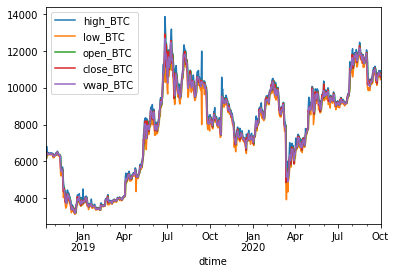

In [80]:
btc.plot(y=['high_BTC', 'low_BTC', 'open_BTC', 'close_BTC', 'vwap_BTC'])

In [81]:
btc['2020-07-10']

,time,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC
dtime,,,,,,,,,,,
2020-07-10,1594339200,9236.0,9314.9,9125.0,9286.0,9193.5,2662.550287,10947,9.139371,9.118773,9.126252


'2020-07-10' showed the vwap and volume at 0 in previous data pulls.

---

In [82]:
eth = pull_data('ETH')

Pulled _ETH at 2020-10-01 14:57:29.763471


In [83]:
eth.head()

,time,open_ETH,high_ETH,low_ETH,close_ETH,vwap_ETH,volume_ETH,count_ETH,log_high_ETH,log_low_ETH,log_vwap_ETH
dtime,,,,,,,,,,,
2020-10-01,1601510400,359.70,371.32,345.30,353.00,357.72,55612.207942,10463,5.917064,5.844414,5.879751
2020-09-30,1601424000,359.94,361.23,351.34,359.69,356.23,37139.558380,6434,5.889515,5.861754,5.875577
2020-09-29,1601337600,353.88,360.59,350.40,359.94,355.23,44365.237803,8452,5.887742,5.859075,5.872765
2020-09-28,1601251200,357.38,369.08,351.52,353.85,360.70,52341.010715,9877,5.911013,5.862267,5.888047
2020-09-27,1601164800,354.17,362.28,347.46,357.30,355.61,44496.296034,7927,5.892417,5.850650,5.873835


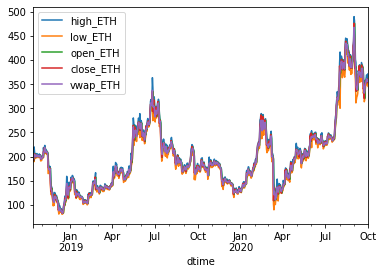

In [84]:
eth.plot(y=['high_ETH', 'low_ETH', 'open_ETH', 'close_ETH', 'vwap_ETH'])

In [85]:
eth[eth['vwap_ETH'] == 0]

,time,open_ETH,high_ETH,low_ETH,close_ETH,vwap_ETH,volume_ETH,count_ETH,log_high_ETH,log_low_ETH,log_vwap_ETH
dtime,,,,,,,,,,,


---

In [86]:
ltc = pull_data('LTC')

Pulled _LTC at 2020-10-01 14:57:45.613120


In [87]:
ltc.head()

,time,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,
2020-10-01,1601510400,46.24,48.47,45.22,46.34,46.81,30822.568060,2015,3.880945,3.811539,3.846097
2020-09-30,1601424000,45.66,46.65,45.48,46.24,45.99,17335.470485,1106,3.842673,3.817273,3.828424
2020-09-29,1601337600,45.21,45.77,44.95,45.66,45.42,11704.058289,868,3.823629,3.805551,3.815953
2020-09-28,1601251200,46.10,47.14,44.83,45.21,46.47,22907.891823,1320,3.853122,3.802878,3.838807
2020-09-27,1601164800,46.05,46.57,44.63,46.10,45.70,12568.506357,699,3.840957,3.798406,3.822098


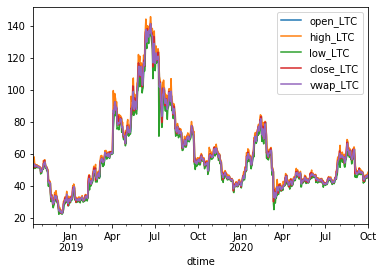

In [88]:
ltc.plot(y=['open_LTC', 'high_LTC', 'low_LTC', 'close_LTC', 'vwap_LTC'])

---

### Data Merge

In [89]:
dfs = [btc, eth, ltc]

In [90]:
df = merge_data(dfs)

In [91]:
df.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-10-01,10774.9,10930.0,10451.0,10582.3,10687.4,4708.909113,17098,9.299267,9.254453,9.276821,...,46.24,48.47,45.22,46.34,46.81,30822.568060,2015,3.880945,3.811539,3.846097
2020-09-30,10841.4,10842.4,10670.0,10774.9,10735.3,2473.829221,10450,9.291220,9.275191,9.281293,...,45.66,46.65,45.48,46.24,45.99,17335.470485,1106,3.842673,3.817273,3.828424
2020-09-29,10694.1,10860.0,10645.0,10842.2,10739.0,2743.908282,11824,9.292842,9.272846,9.281637,...,45.21,45.77,44.95,45.66,45.42,11704.058289,868,3.823629,3.805551,3.815953
2020-09-28,10776.1,10945.0,10640.0,10694.1,10866.7,3476.448483,13436,9.300638,9.272376,9.293458,...,46.10,47.14,44.83,45.21,46.47,22907.891823,1320,3.853122,3.802878,3.838807
2020-09-27,10733.4,10799.0,10600.0,10776.1,10711.8,1581.063377,7583,9.287209,9.268609,9.279101,...,46.05,46.57,44.63,46.10,45.70,12568.506357,699,3.840957,3.798406,3.822098


In [92]:
df.to_csv('crypto_prices.csv')

In [93]:
df = pd.read_csv('crypto_prices.csv')

In [94]:
df.head()

,dtime,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
0,2020-10-01,10774.9,10930.0,10451.0,10582.3,10687.4,4708.909113,17098,9.299267,9.254453,...,46.24,48.47,45.22,46.34,46.81,30822.568060,2015,3.880945,3.811539,3.846097
1,2020-09-30,10841.4,10842.4,10670.0,10774.9,10735.3,2473.829221,10450,9.291220,9.275191,...,45.66,46.65,45.48,46.24,45.99,17335.470485,1106,3.842673,3.817273,3.828424
2,2020-09-29,10694.1,10860.0,10645.0,10842.2,10739.0,2743.908282,11824,9.292842,9.272846,...,45.21,45.77,44.95,45.66,45.42,11704.058289,868,3.823629,3.805551,3.815953
3,2020-09-28,10776.1,10945.0,10640.0,10694.1,10866.7,3476.448483,13436,9.300638,9.272376,...,46.10,47.14,44.83,45.21,46.47,22907.891823,1320,3.853122,3.802878,3.838807
4,2020-09-27,10733.4,10799.0,10600.0,10776.1,10711.8,1581.063377,7583,9.287209,9.268609,...,46.05,46.57,44.63,46.10,45.70,12568.506357,699,3.840957,3.798406,3.822098


In [95]:
df.set_index('dtime', inplace=True)

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-10-01,10774.9,10930.0,10451.0,10582.3,10687.4,4708.909113,17098,9.299267,9.254453,9.276821,...,46.24,48.47,45.22,46.34,46.81,30822.568060,2015,3.880945,3.811539,3.846097
2020-09-30,10841.4,10842.4,10670.0,10774.9,10735.3,2473.829221,10450,9.291220,9.275191,9.281293,...,45.66,46.65,45.48,46.24,45.99,17335.470485,1106,3.842673,3.817273,3.828424
2020-09-29,10694.1,10860.0,10645.0,10842.2,10739.0,2743.908282,11824,9.292842,9.272846,9.281637,...,45.21,45.77,44.95,45.66,45.42,11704.058289,868,3.823629,3.805551,3.815953
2020-09-28,10776.1,10945.0,10640.0,10694.1,10866.7,3476.448483,13436,9.300638,9.272376,9.293458,...,46.10,47.14,44.83,45.21,46.47,22907.891823,1320,3.853122,3.802878,3.838807
2020-09-27,10733.4,10799.0,10600.0,10776.1,10711.8,1581.063377,7583,9.287209,9.268609,9.279101,...,46.05,46.57,44.63,46.10,45.70,12568.506357,699,3.840957,3.798406,3.822098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-17,6460.3,6469.8,6411.9,6442.5,6438.4,1683.992001,5375,8.774900,8.765911,8.770035,...,53.10,53.22,52.30,52.93,52.69,4882.802936,605,3.974434,3.956996,3.964426
2018-10-16,6438.5,6490.0,6391.5,6460.4,6441.8,3270.364601,8233,8.778018,8.762724,8.770563,...,53.48,54.19,52.54,53.10,53.35,11349.662323,702,3.992496,3.961575,3.976874
2018-10-15,6181.9,6820.0,6151.0,6438.5,6449.8,11345.747326,28535,8.827615,8.724370,8.771804,...,51.14,58.09,50.86,53.48,53.71,38150.198318,3528,4.061994,3.929077,3.983599


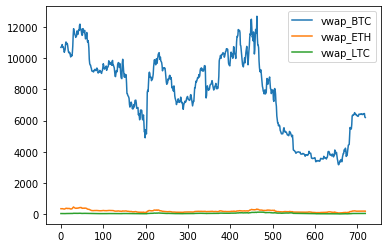

In [96]:
df.plot(y=['vwap_BTC', 'vwap_ETH', 'vwap_LTC'])

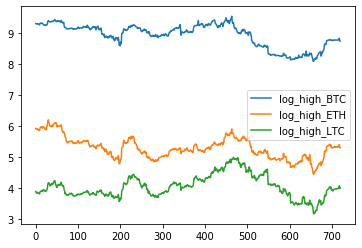

In [97]:
df.plot(y=['log_high_BTC', 'log_high_ETH', 'log_high_LTC'])